In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
df = pd.read_csv('customer_personality_analysis.csv', sep='\t')

In [3]:
df.shape

(2240, 29)

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## 데이터 컬럼 종류

### People (사람)

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level (교육 수준)
- Marital_Status: Customer's marital status (결혼 상태)
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household (어린 아이의 수)
- Teenhome: Number of teenagers in customer's household (10대 수)
- Dt_Customer: Date of customer's enrollment with the company (서비스 가입 날짜)
- Recency: Number of days since customer's last purchase (마지막으로 구매한 날로부터 얼마가 지났는지)
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

### Products (상품)

- MntWines: Amount spent on **wine** in last 2 years
- MntFruits: Amount spent on **fruits** in last 2 years
- MntMeatProducts: Amount spent on **meat** in last 2 years
- MntFishProducts: Amount spent on **fish** in last 2 years
- MntSweetProducts: Amount spent on **sweets** in last 2 years
- MntGoldProds: Amount spent on **gold** in last 2 years

### Promotion (프로모션)

- NumDealsPurchases: Number of purchases made with a discount (할인 받아 구매한 수)
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place (구매 장소)

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

# 데이터 정제하기(Cleaning)

- 결측치(Missing Values)와 이상치(Outliers)를 제거하자
- 데이터를 바로 사용할 수 있으면 좋겠지만, 바로 사용할 수 있는 경우가 많지 않다.
    - 결측치가 있을 수 있고, 컴퓨터가 이해할 수 있는 형태(숫자형)으로 바꿔주어야 하는 경우도 있다.
    - Outlier가 너무 크다면, 이상치로 인해 모델이 왜곡될 수 있다.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## 결측치 제거하기

- 결측치를 제거하는 방법은 크게 3가지이다.
    - 결측치의 비중이 작다면 제거한다.
    - 결측치를 빈도가 가장 높은 값이나 평균으로 채운다.
    - 결측치를 예측하는 모ㅔㄷㄹ을 만들어 예측값으로 채운다.

### 해당 데이터에서는 24개로 결측치가 많지 않기 때문에 제거한다.

In [6]:
df = df.dropna()
df.shape

(2216, 29)

In [7]:
df['Dt_Customer'].head()

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

In [8]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [9]:
df['Dt_Customer'].head()

0   2012-04-09
1   2014-08-03
2   2013-08-21
3   2014-10-02
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [10]:
max(df['Dt_Customer']), min(df['Dt_Customer'])

(Timestamp('2014-12-06 00:00:00'), Timestamp('2012-01-08 00:00:00'))

In [11]:
recent_date = max(df['Dt_Customer'])
df = df.assign(Customer_For=lambda df: recent_date - df['Dt_Customer'])
df['Customer_For'].head()

0   971 days
1   125 days
2   472 days
3    65 days
4   321 days
Name: Customer_For, dtype: timedelta64[ns]

errors: 총 3개의 옵션이 있다.
- ignore  만약 숫자로 변경할 수 없는 데이터라면 숫자로 변경하지 않고 원본 데이터를 그대로 반환합니다.<br>
- coerce  만약 숫자로 변경할 수 없는 데이터라면 기존 데이터를 지우고 NaN으로 설정하여 반환합니다.<br>
- raise   만약 숫자로 변경할 수 없는 데이터라면 에러를 일으켜 코드를 중단합니다.<br>

In [12]:
df['Customer_For'] = pd.to_numeric(df['Customer_For'], errors='coerce')

## 카테고리 데이터 정리하기

앞에서 본 데이터 중 카테고리 형태의 데이터는 Education과 Marital_Status

In [13]:
df[['Education', 'Marital_Status']].head(10)

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
5,Master,Together
6,Graduation,Divorced
7,PhD,Married
8,PhD,Together
9,PhD,Together


In [14]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [15]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [16]:
df['Living_With'] = df['Marital_Status'].replace({
    'Married': 'Partner',
    'Together': 'Partner',
    'Single': 'Alone',
    'Divorced': 'Alone',
    'Widow': 'Alone',
    'YOLO': 'Alone',
    'Absurd': 'Alone'
})

In [17]:
df['Living_With'].value_counts()

Partner    1430
Alone       786
Name: Living_With, dtype: int64

In [18]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [19]:
df['Children'].value_counts()

1    1117
0     633
2     416
3      50
Name: Children, dtype: int64

### 위의 데이터를 통해 가족 사이즈를 구할 수 있다.

In [20]:
df['Family_Size'] = df['Living_With'].replace({'Partner': 2, 'Alone': 1}) + df['Children']

In [21]:
df['Family_Size'].value_counts()

3    880
2    757
4    296
1    252
5     31
Name: Family_Size, dtype: int64

### 아이가 있는지에 따라 부모 여부를 구할 수 있다.

In [22]:
df['Is_Parent'] = np.where(df.Children > 0, 1, 0)

In [23]:
df['Is_Parent'].value_counts()

1    1583
0     633
Name: Is_Parent, dtype: int64

### 교육 상태 정리하기

In [24]:
df['Education'] = df['Education'].replace({
    'Basic': 'Undergraduate',
    '2n Cycle': 'Undergraduate',
    'Graduation': 'Graduate',
    'Master': 'Postgraduate',
    'PhD': 'Postgraduate'
})

### 생년 월일을 통해 나이를 구할 수 있다.

In [25]:
df['Year_Birth']

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2216, dtype: int64

In [26]:
from datetime import date
df['Age'] = date.today().year - df['Year_Birth']

In [27]:
df['Age'].head()

0    65
1    68
2    57
3    38
4    41
Name: Age, dtype: int64

### 다양한 잡화 구매를 더해서 총 사용한 비용을 구한다.

In [28]:
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [29]:
df['Spent'].head()

0    1617
1      27
2     776
3      53
4     422
Name: Spent, dtype: int64

In [30]:
Mnt_Columns = [c for c in df.columns if 'Mnt' in c]
Mnt_Columns

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [31]:
df['Spent'] = df[Mnt_Columns].sum(axis=1)

In [32]:
df['Spent'].head()

0    1617
1      27
2     776
3      53
4     422
Name: Spent, dtype: int64

### 컬럼명 짧게 변경

In [33]:
df.rename(columns={
    'MntWines':'Wines',
    'MntFruits':'Fruits',
    'MntMeatProducts':'Meat',
    'MntFishProducts':'Fish',
    'MntSweetProducts':'Sweet',
    'MntGoldProds':'Gold'
})[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']]

,Wines,Fruits,Meat,Fish,Sweet,Gold
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


In [34]:
short_names = list(df[Mnt_Columns].columns.map(lambda c: [c, c.replace('Mnt', '').replace('Products', '').replace('Prods', '')]))
short_names

[['MntWines', 'Wines'],
 ['MntFruits', 'Fruits'],
 ['MntMeatProducts', 'Meat'],
 ['MntFishProducts', 'Fish'],
 ['MntSweetProducts', 'Sweet'],
 ['MntGoldProds', 'Gold']]

In [35]:
for name in short_names:
    df = df.rename({name[0]:name[1]}, axis='columns')

In [36]:
df[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']]

,Wines,Fruits,Meat,Fish,Sweet,Gold
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


### 모두 동일한 값, 필요없는 컬럼 제거

In [37]:
df.Z_CostContact.value_counts()

3    2216
Name: Z_CostContact, dtype: int64

In [38]:
df.Z_Revenue.value_counts()

11    2216
Name: Z_Revenue, dtype: int64

In [39]:
to_drop = ['Z_CostContact', 'Z_Revenue', 'Marital_Status', 'Dt_Customer', 'Year_Birth', 'ID']
df = df.drop(to_drop, axis=1)
df

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,...,AcceptedCmp2,Complain,Response,Customer_For,Living_With,Children,Family_Size,Is_Parent,Age,Spent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,83894400000000000,Alone,0,1,0,65,1617
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,10800000000000000,Alone,2,3,1,68,27
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,40780800000000000,Partner,0,2,0,57,776
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,5616000000000000,Partner,1,3,1,38,53
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,27734400000000000,Partner,1,3,1,41,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,46742400000000000,Partner,1,3,1,55,1341
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,5270400000000000,Partner,3,5,1,76,444
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,27216000000000000,Alone,0,1,0,41,1241
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,27302400000000000,Partner,1,3,1,66,843


## Outlier 제거하기

정리한 데이터를 다시 한번 살펴보자

In [40]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Children,Family_Size,Is_Parent,Age,Spent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,0.947202,2.592509,0.714350,53.179603,607.075361
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,0.749062,0.905722,0.451825,11.985554,602.900476
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,26.000000,5.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,0.000000,2.000000,0.000000,45.000000,69.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,1.000000,3.000000,1.000000,52.000000,396.500000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,1.000000,3.000000,1.000000,63.000000,1048.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,3.000000,5.000000,1.000000,129.000000,2525.000000


In [41]:
# 색상 지정
sns.set(rc={'axes.facecolor': '#FFF9ED', 'figure.facecolor':'#FFF9ED'})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

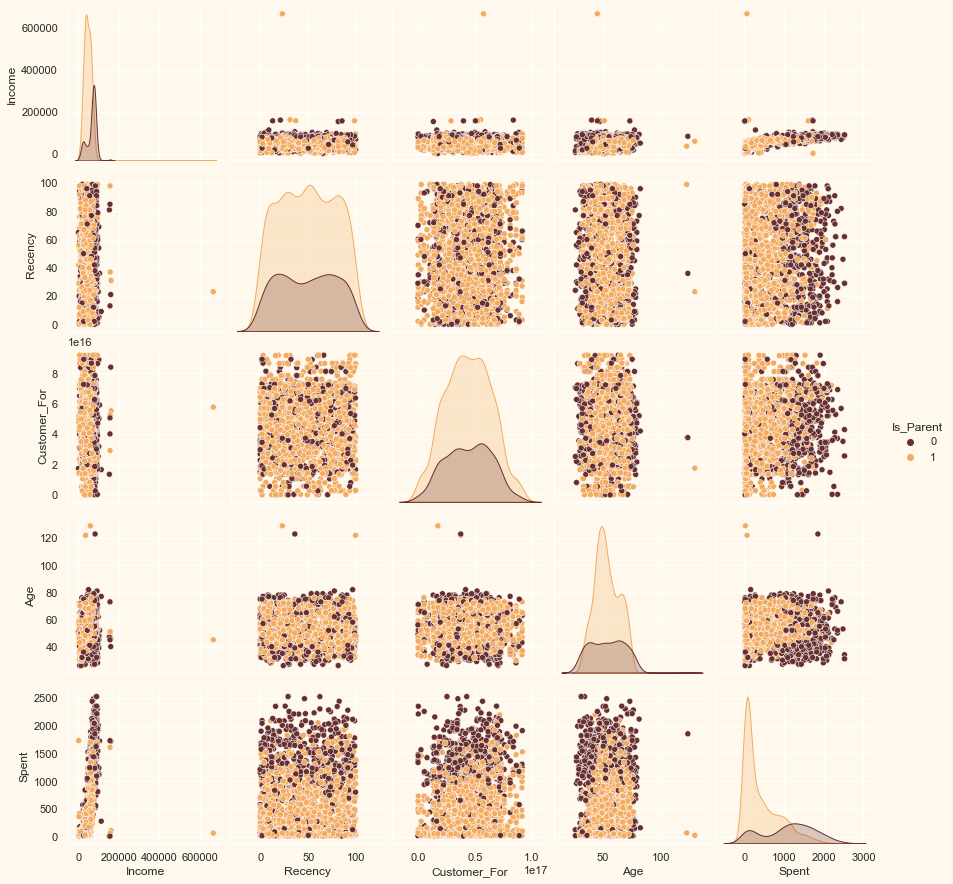

In [42]:
# 아래의 정해진 컬럼들 사이의 상관관계를 그래프로 확인해본다
To_Plot = ['Income', 'Recency', 'Customer_For', 'Age', 'Spent', 'Is_Parent']
sns.pairplot(df[To_Plot], hue='Is_Parent', palette=(['#682F2F', '#F3AB60']))

In [43]:
df.shape

(2216, 30)

In [44]:
# Dropping the outliers by setting a cap on Age and income
df = df[df['Age'] < 90]
df = df[df['Income'] < 600000]
df.shape

(2212, 30)

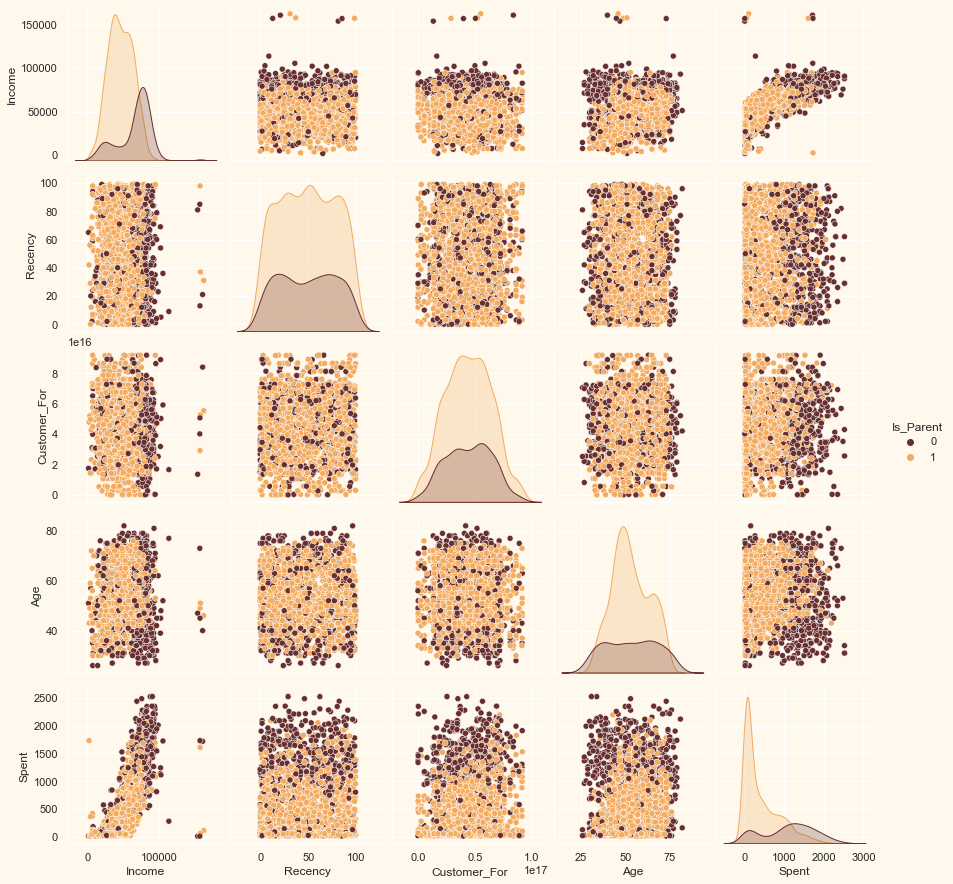

In [45]:
sns.pairplot(df[To_Plot], hue='Is_Parent', palette=(['#682F2F', '#F3AB60']))

## Correlation Coefficients

- correlation (상관성)이란?
  - 상관성은 두 변수간의 “선형적” 관계의 정도를 의미
  - -1 ~ 1 사이를 가지며 1에 가까울 수록 양의 선형관계, -1에 가까울 수록 음의 선형관계가 강하다는 것을 의미

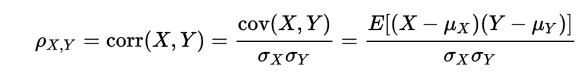

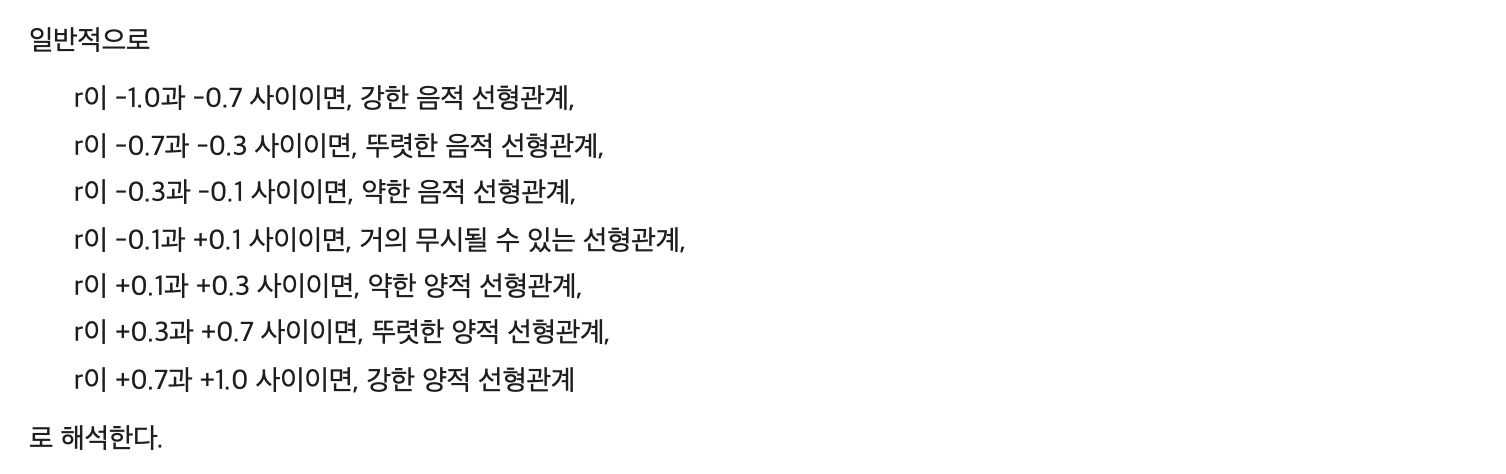

In [46]:
df.corr()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Children,Family_Size,Is_Parent,Age,Spent
Income,1.000000,-0.514523,0.034565,0.007965,0.688209,0.507354,0.692279,0.520040,0.523599,0.388299,...,0.327524,0.104036,-0.027900,0.161387,-0.027892,-0.343529,-0.286638,-0.403132,0.199977,0.792740
Kidhome,-0.514523,1.000000,-0.039066,0.010623,-0.497203,-0.373258,-0.439031,-0.388643,-0.377843,-0.354922,...,-0.174261,-0.081911,0.037067,-0.077901,-0.057731,0.688081,0.583250,0.520355,-0.237497,-0.557949
Teenhome,0.034565,-0.039066,1.000000,0.014392,0.003945,-0.175905,-0.261134,-0.205235,-0.163107,-0.018579,...,-0.145198,-0.015633,0.007746,-0.154402,0.008986,0.698199,0.594481,0.587993,0.361932,-0.137964
Recency,0.007965,0.010623,0.014392,1.000000,0.015981,-0.005257,0.022914,0.000788,0.025244,0.018148,...,-0.021147,-0.001429,0.005713,-0.200114,0.030748,0.018062,0.014717,0.002189,0.015694,0.020479
Wines,0.688209,-0.497203,0.003945,0.015981,1.000000,0.385844,0.568081,0.396915,0.389583,0.391461,...,0.351610,0.206309,-0.036420,0.246320,0.148745,-0.353356,-0.296702,-0.341994,0.164615,0.892996
Fruits,0.507354,-0.373258,-0.175905,-0.005257,0.385844,1.000000,0.546740,0.593038,0.571474,0.393459,...,0.192417,-0.009924,-0.002956,0.123007,0.059828,-0.395161,-0.341414,-0.410657,0.013447,0.612129
Meat,0.692279,-0.439031,-0.261134,0.022914,0.568081,0.546740,1.000000,0.572986,0.534624,0.357556,...,0.313379,0.043549,-0.021017,0.237966,0.071381,-0.504176,-0.429948,-0.574147,0.033622,0.845543
Fish,0.520040,-0.388643,-0.205235,0.000788,0.396915,0.593038,0.572986,1.000000,0.583484,0.426299,...,0.261712,0.002322,-0.019098,0.108135,0.078042,-0.427482,-0.363522,-0.449596,0.041154,0.641884
Sweet,0.523599,-0.377843,-0.163107,0.025244,0.389583,0.571474,0.534624,0.583484,1.000000,0.356754,...,0.245113,0.010142,-0.020569,0.116059,0.076345,-0.389152,-0.330705,-0.402064,0.021516,0.606652
Gold,0.388299,-0.354922,-0.018579,0.018148,0.391461,0.393459,0.357556,0.426299,0.356754,1.000000,...,0.170853,0.050976,-0.030166,0.141096,0.145632,-0.267776,-0.235826,-0.245380,0.059779,0.527101


## correlation matrix 히트맵으로 표현하기

<AxesSubplot:>

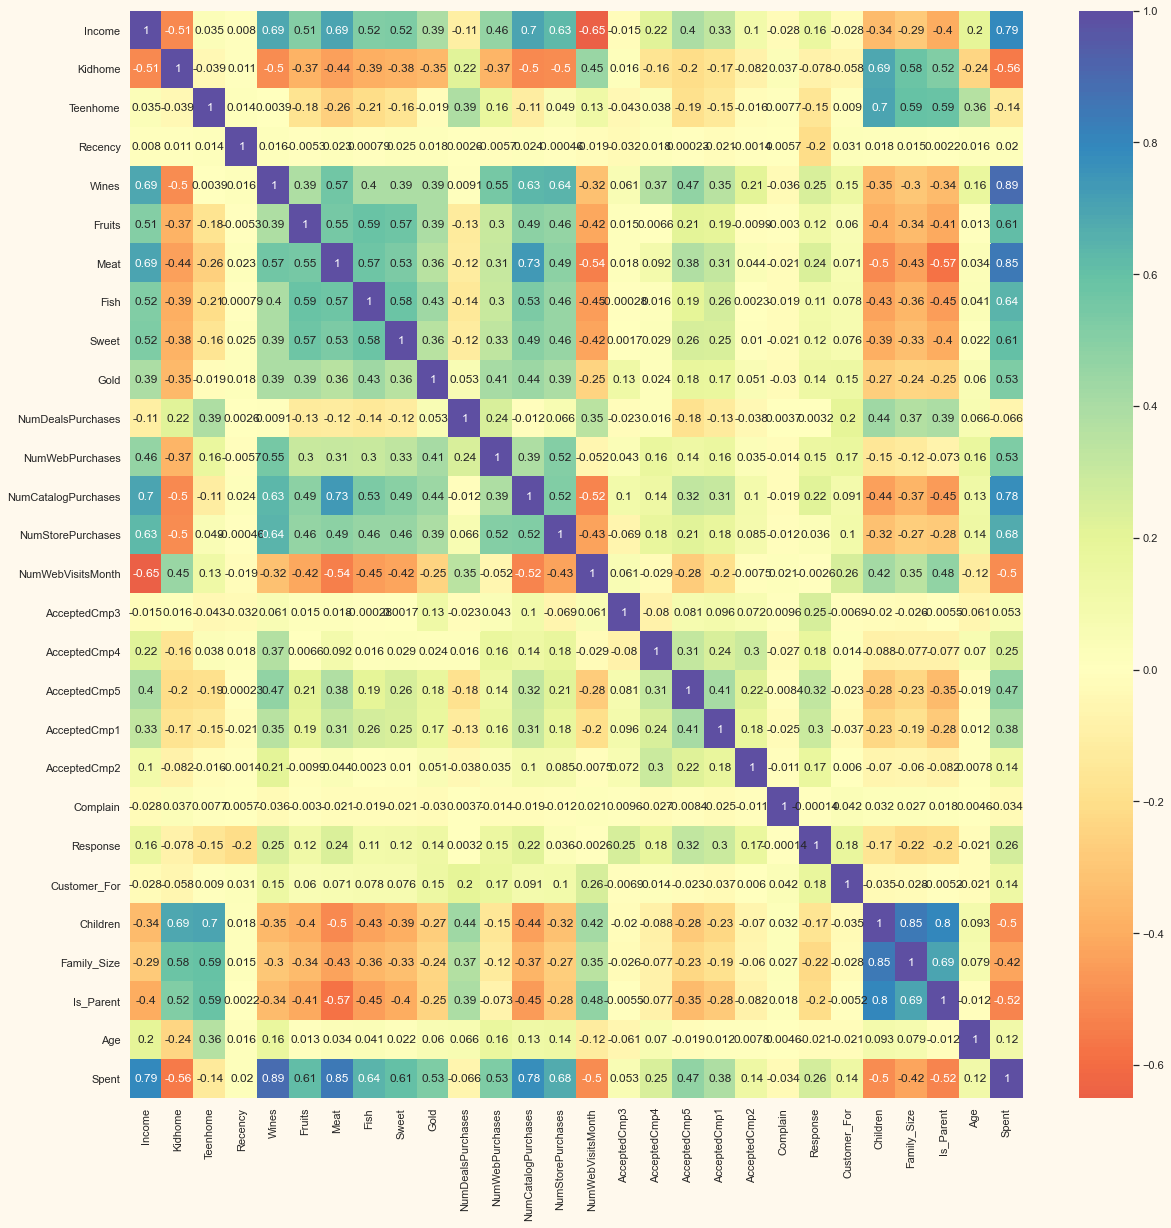

In [47]:
corrmat = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap='Spectral', center=0)

# 데이터 전처리하기(Preprocessing)

In [48]:
df.dtypes

Education               object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
Wines                    int64
Fruits                   int64
Meat                     int64
Fish                     int64
Sweet                    int64
Gold                     int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Customer_For             int64
Living_With             object
Children                 int64
Family_Size              int64
Is_Parent                int32
Age                      int64
Spent                    int64
dtype: object

In [49]:
object_cols = list(df.dtypes[df.dtypes == object].index)
print('카테고리 데이터 종류:', object_cols)

카테고리 데이터 종류: ['Education', 'Living_With']


### 카테고리 데이터에 라벨 인코더 사용하기

라벨 인코더란 카테고리형 데이터에 숫자를 맵핑하여 바꿔준다

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
LE = LabelEncoder()

In [52]:
df['Education'] = df[['Education']].apply(LE.fit_transform)

In [53]:
df['Education'].value_counts()

0    1115
1     845
2     252
Name: Education, dtype: int64

In [54]:
LE.classes_

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

In [55]:
LE.inverse_transform([0, 1, 2])

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

In [56]:
df['Living_With'] = df[['Living_With']].apply(LE.fit_transform)

In [57]:
df['Living_With'].head()

0    0
1    0
2    1
3    1
4    1
Name: Living_With, dtype: int32

피쳐 간 규모를 맞추기 위해 Scaling 하기

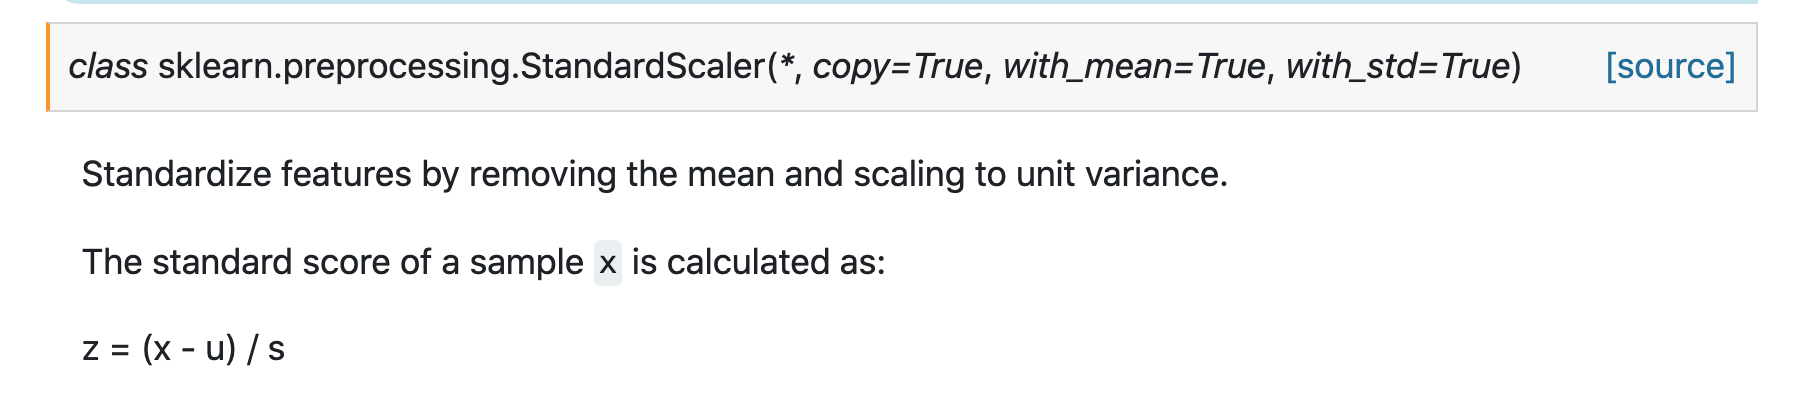

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
ds = df.copy()

In [60]:
ds.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_For',
       'Living_With', 'Children', 'Family_Size', 'Is_Parent', 'Age', 'Spent'],
      dtype='object')

In [61]:
cols_del = [c for c in ds.columns if 'cmp' in c.lower()] + ['Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

In [62]:
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns=ds.columns)

In [63]:
scaled_ds

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Living_With,Children,Family_Size,Is_Parent,Age,Spent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,-1.349603,-1.264598,-1.758359,-1.581139,1.018352,1.676245
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,-1.349603,1.404572,0.449070,0.632456,1.274785,-0.963297
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.740959,-1.264598,-0.654644,-1.581139,0.334530,0.280110
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,0.740959,0.069987,0.449070,0.632456,-1.289547,-0.920135
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,0.740959,0.069987,0.449070,0.632456,-1.033114,-0.307562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.893586,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,...,0.111982,-0.555814,-0.132545,0.124112,0.740959,0.069987,0.449070,0.632456,0.163575,1.218061
2208,0.571657,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,...,-0.229679,-0.248141,0.692181,-1.940414,0.740959,2.739158,2.656499,0.632456,1.958607,-0.271040
2209,-0.893586,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,...,0.111982,2.213242,0.279818,-0.847936,-1.349603,-1.264598,-1.758359,-1.581139,-1.033114,1.052052
2210,0.571657,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,...,0.795303,1.290224,-0.957271,-0.843635,0.740959,0.069987,0.449070,0.632456,1.103830,0.391336


# Dimension Reduction

## 차원의 저주
- Feature들이 늘어나면 학습에 소요되는 시간과 비용이 증가한다
- 데이터 간 빈 공간들이 많이 생긴다(컴퓨터에서는 거의 모든 값이 0)
- 데이터 학습을 하는데 차원이 증가하면서 학습 데이터 수가 차원의 수보다 적어져 성능이 저하되는 현상


## Feature Selection
- Feature의 중요도나 랭킹을 매겨, feature의 subset을 추출하거나 불필요한 feature를 제거

## Feature Extraction
- 기존 feature를 조합하여 새로운 특징을 생성

## 차원 축소의 대표적인 방법(Principal component analysis; PCA)
- 고차원의 데이터를 저차원의 데이터로 환원시키는 기법을 말한다.
- 이때 서로 연관 가능성이 있는 고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간(주성분)의 표본으로 변환하기 위해 직교 변환을 사용한다.
- 데이터를 한 개의 축으로 사상시켰을 때 = 선 하나를 그리고 모든 점들을 그 선으로 내린다<br>
그 분산이 가장 커지는 축을 첫 번째 주성분, = 데이터가 제일 길게 퍼져있는 선을 그린다<br>
두 번째로 커지는 축을 두 번째 주성분으로 놓이도록 = 첫 번째 선과 직각이 되는 성분이다<br>
새로운 좌표계로 데이터를 선형 변환한다.

In [64]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
pca_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(['col1', 'col2', 'col3']))
pca_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,6.203597e-17,2.878377,-5.969395,-2.538494,-0.780421,2.383290,7.444305
col2,2212.0,-5.280084e-17,1.706839,-4.312232,-1.328316,-0.158070,1.242323,6.142830
col3,2212.0,1.821930e-17,1.221956,-3.530226,-0.828725,-0.021658,0.798988,6.613396


Text(0.5, 0.92, 'A 3D Projection Of Data In The Reduced Dimension')

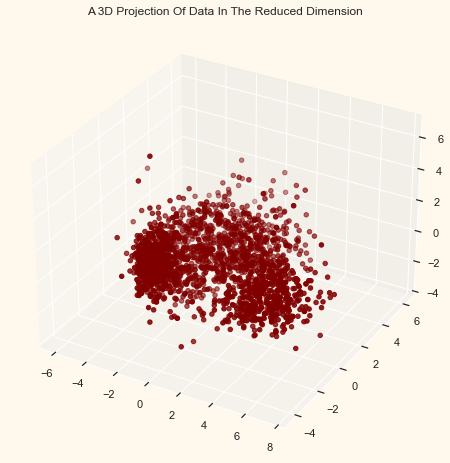

In [66]:
x = pca_ds['col1']
y = pca_ds['col2']
z = pca_ds['col3']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='maroon', marker='o')
ax.set_title('A 3D Projection Of Data In The Reduced Dimension')

# 유저 세그먼트 나누기(Clustering)

클러스터링 하기 전 궁금증. 데이터를 몇 개로 나눠야 할까?!

## Elbow Method 

데이터를 몇 개로 나눠야 할까?

* Elbow Method 

- WSS(군집 내 분산)은 작을 수록 군집의 중심에 많이 모여있는 것이므로 WSS(군집 내 분산)이 작을 수록 좋다. 
- 하지만 클러스터를 늘려서 더 이상 작아지지 않는 한계점이 있다면 더 이상 클러스터 수를 증가시키지 않아도 좋다.



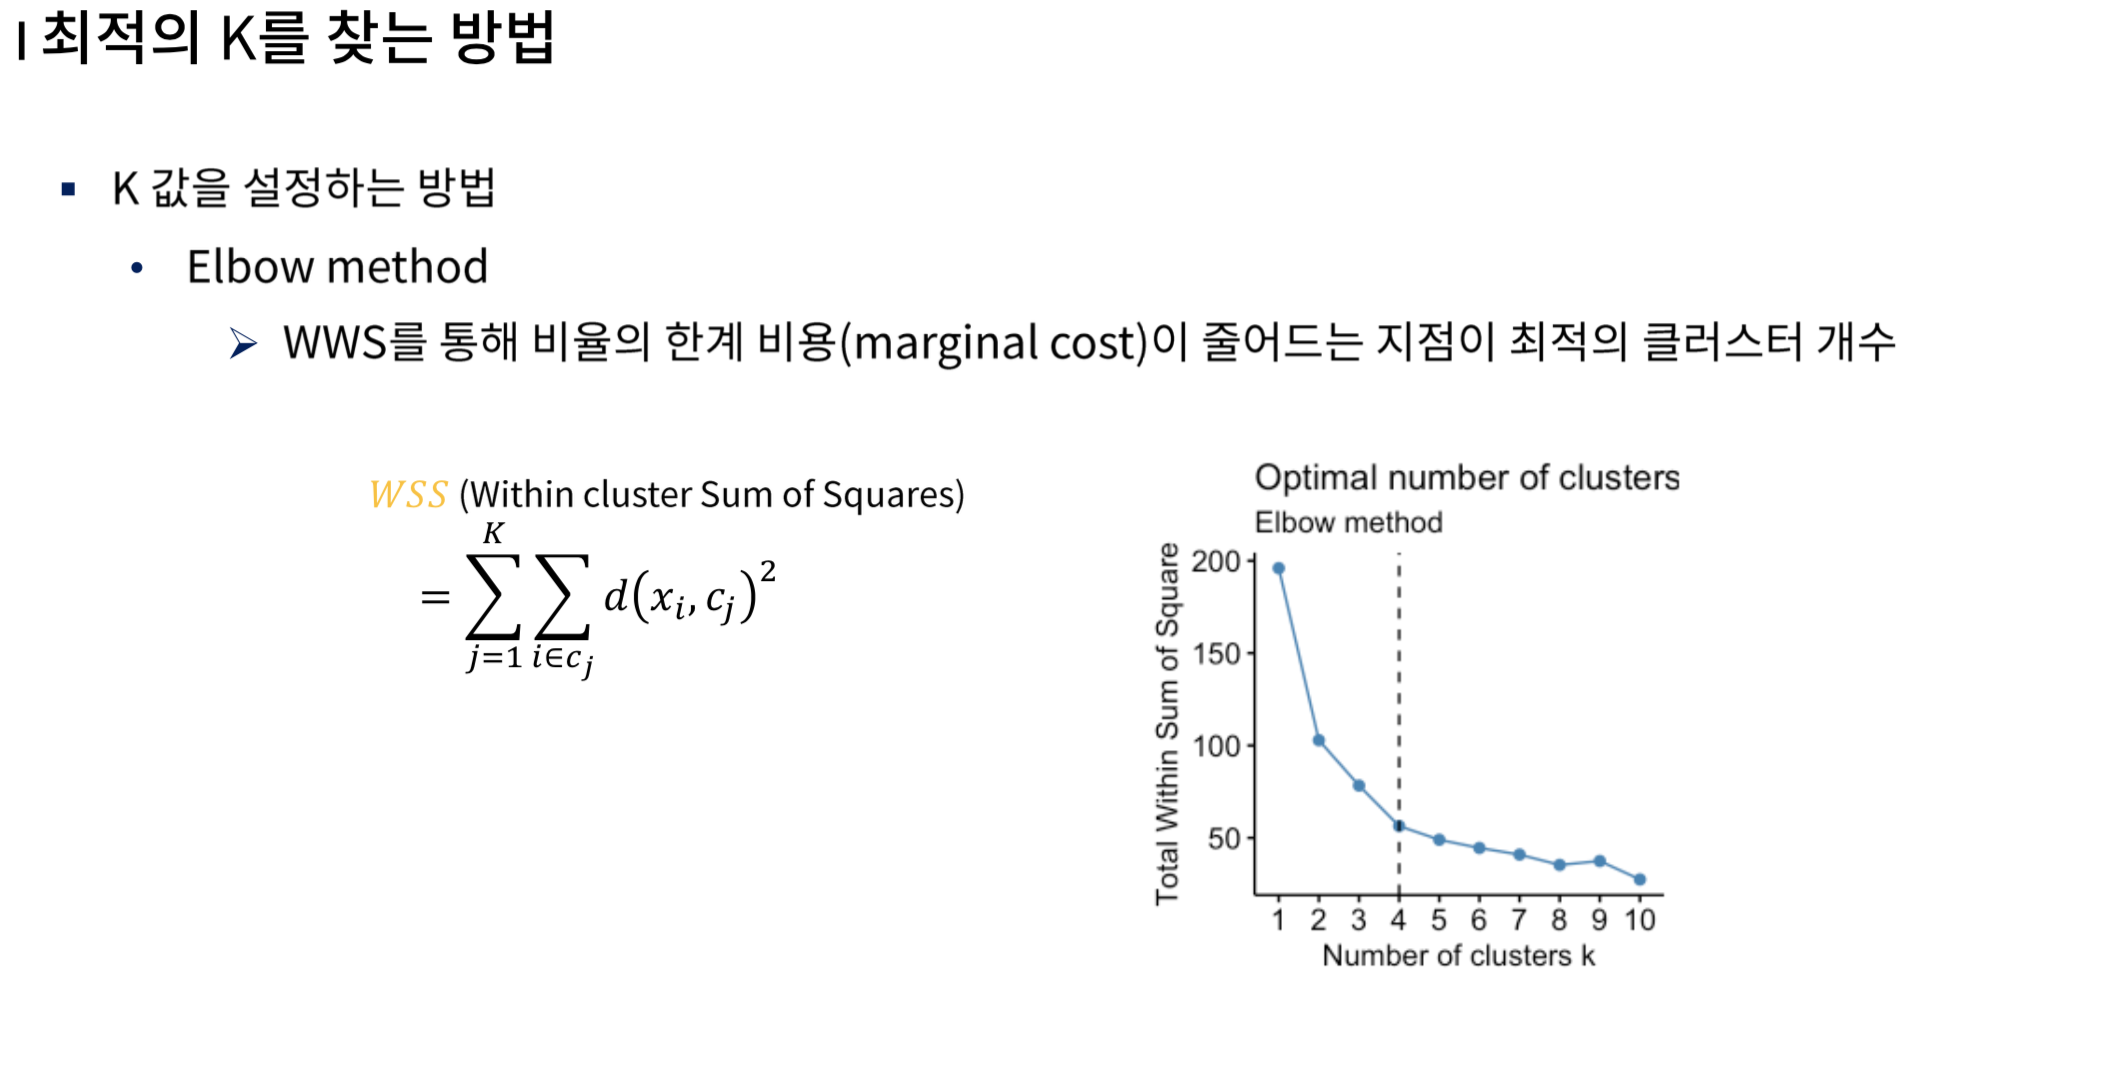

이미지 출처: https://heung-bae-lee.github.io/2020/05/30/machine_learning_19/

In [67]:
from sklearn.cluster import KMeans

In [68]:
distortions = []

# 클러스터 개수를 1 ~ 10까지 늘려보면서 클러스트 간 거리합을 저장한다.
K = range(1, 10)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel.fit(pca_ds)
    distortions.append(kmeansModel.inertia_)
distortions

[28060.971107921483,
 13841.214499408406,
 9625.413190996183,
 7482.945982894592,
 6591.3757794142875,
 5885.570391716011,
 5317.9752499891965,
 4867.986812923748,
 4531.673324189876]

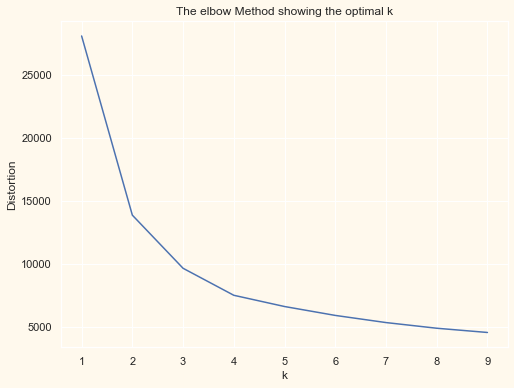

In [69]:
plt.figure(figsize=(8, 6))
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The elbow Method showing the optimal k')
plt.show()

# 클러스터링

- Hierachical Clustrering을 먼저 적용해 보자

In [70]:
from sklearn.cluster import AgglomerativeClustering

In [71]:
# 유사도 기준: affinity, euclidean가 기본
AC = AgglomerativeClustering(n_clusters=4)

yhat_AC = AC.fit_predict(pca_ds)
pca_ds['Clusters'] = yhat_AC

# 기존 데이터에도 넣는다
df['Clusters'] = yhat_AC

Text(0.5, 0.92, 'The Plot of the Clusters')

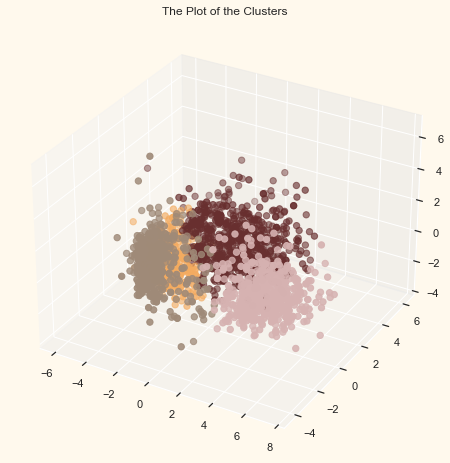

In [72]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=pca_ds['Clusters'], marker='o', cmap=cmap)
ax.set_title('The Plot of the Clusters')

# 모델 평가하기(Evaluation)

## EDA를 통해 만들어진 클러스터와 그 특성 파악하기

### 그룹이 골고루 분포되어 있을까?

Text(0.5, 1.0, 'Distribution Of The Clusters')

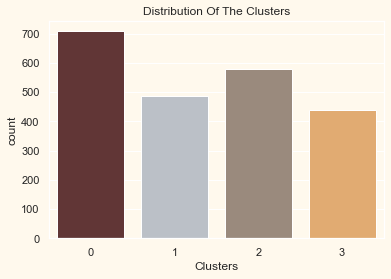

In [76]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df['Clusters'], palette=pal)
pl.set_title('Distribution Of The Clusters')

### 클러스터 별 구매금액과 연간 수입을 알아보자

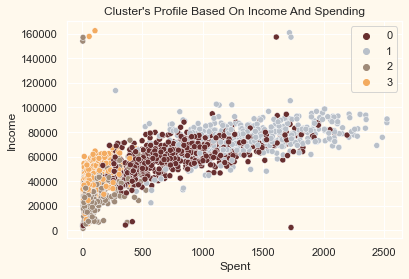

In [80]:
pl = sns.scatterplot(data=df, x=df['Spent'], y=df['Income'], hue=df['Clusters'], palette=pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

- 0: high spending & average income
- 1: high spending & high income
- 2: low spending & low income
- 3: low spending & low income

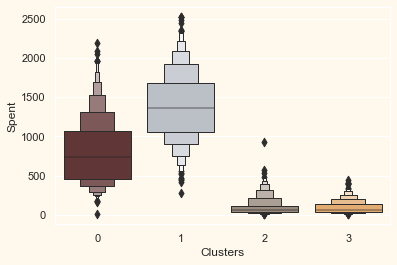

In [106]:
plt.figure()
pl = sns.boxenplot(x=df['Clusters'], y=df['Spent'], palette=pal)

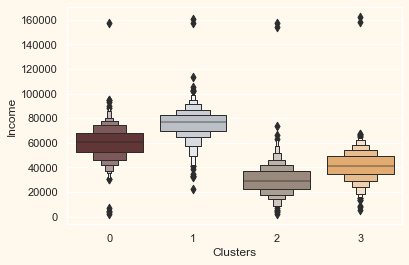

In [107]:
plt.figure()
pl = sns.boxenplot(x=df['Clusters'], y=df['Income'], palette=pal)

C:\Users\lee\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lee\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lee\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lee\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


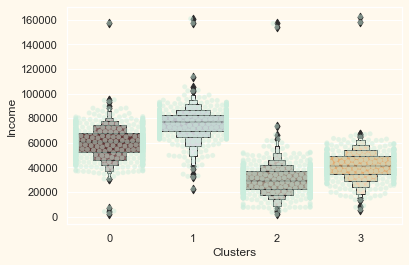

In [108]:
plt.figure()
pl = sns.swarmplot(x=df['Clusters'], y=df['Income'], color='#CBEDDD', alpha=0.5)
pl = sns.boxenplot(x=df['Clusters'], y=df['Income'], palette=pal)

### 어떤 클러스터에서 캠페인 반응이 높을까?

In [104]:
df['Total_Promos'] = df[[c for c in df.columns if 'cmp' in c.lower()]].sum(axis=1)

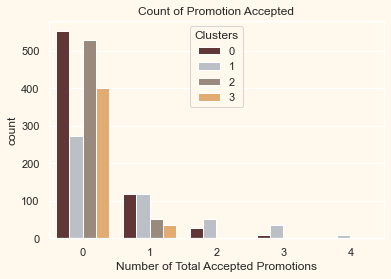

In [105]:
plt.figure()
pl = sns.countplot(x=df['Total_Promos'], hue=df['Clusters'], palette=pal)
pl.set_title('Count of Promotion Accepted')
pl.set_xlabel('Number of Total Accepted Promotions')
plt.show()

### 할인에 잘 반응한 그룹은?

Text(0.5, 1.0, 'Number of Deals Purchased')

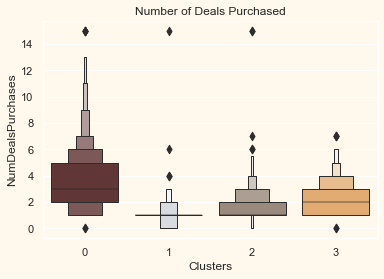

In [111]:
plt.figure()
pl = sns.boxenplot(x=df['Clusters'], y=df['NumDealsPurchases'], palette=pal)
pl.set_title('Number of Deals Purchased')

0번 그룹이 잘 반응했다

### 가족 구성원과 나이대는 어떻게 될까?

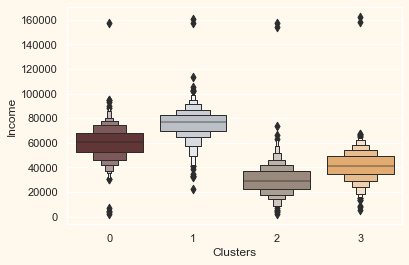

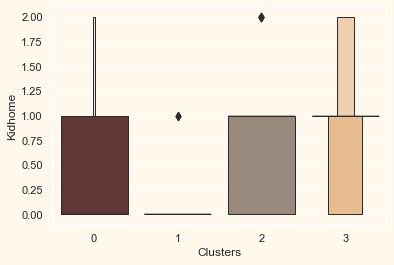

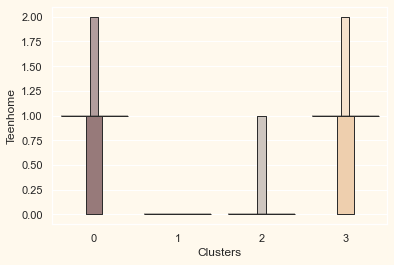

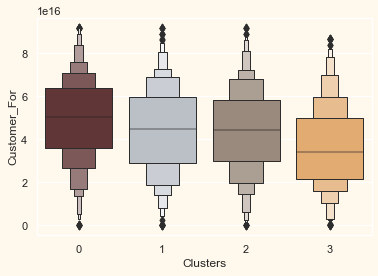

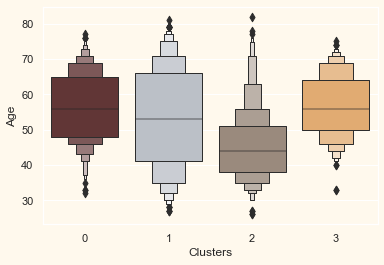

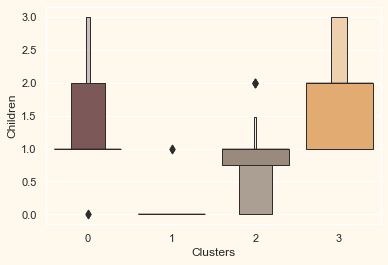

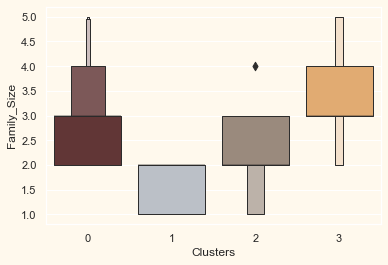

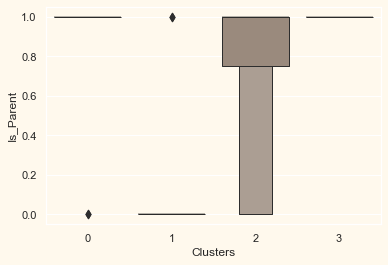

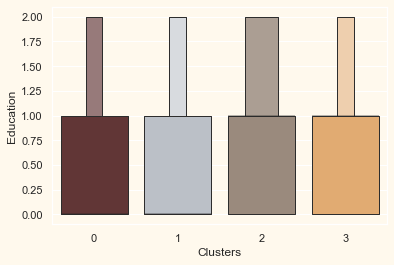

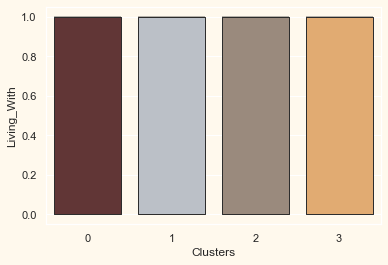

In [113]:
Personal = ["Income","Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for column in Personal:
    plt.figure()
    pl = sns.boxenplot(x=df['Clusters'], y=df[column], palette=pal)

# 다양한 클러스터링 모델 사용해보기

## Density Based Clustering

In [114]:
from sklearn.cluster import DBSCAN

In [115]:
DP = DBSCAN(eps=0.30, min_samples=9)

DP_df = DP.fit_predict(pca_ds)
pca_ds['DBSCAN_Clusters'] = DP_df
df['DBSCAN_Clusters'] = DP_df

Text(0.5, 0.92, 'The Plot Of The Clusters')

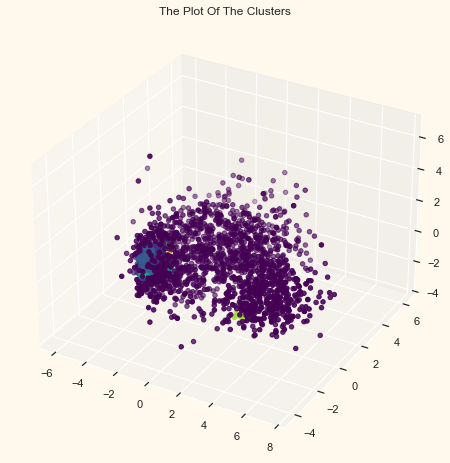

In [118]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, c=pca_ds['DBSCAN_Clusters'], marker='o', cmap='viridis')
ax.set_title('The Plot Of The Clusters')

클러스터 실제 분포 살펴 보기

Text(0.5, 1.0, 'Distribution Of The Clusters')

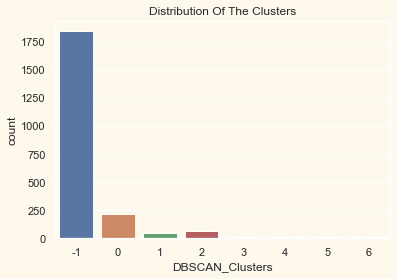

In [119]:
pl = sns.countplot(x=df['DBSCAN_Clusters'])
pl.set_title('Distribution Of The Clusters')

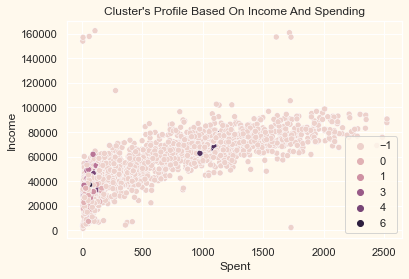

In [121]:
pl = sns.scatterplot(data=df, x=df['Spent'], y=df['Income'], hue=df['DBSCAN_Clusters'])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

C:\Users\lee\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lee\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lee\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lee\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


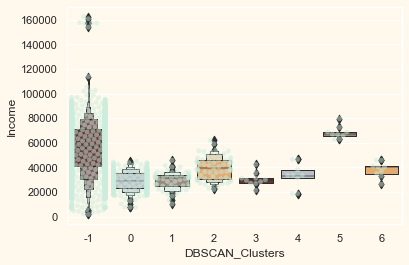

In [122]:
plt.figure()
pl = sns.swarmplot(x=df['DBSCAN_Clusters'], y=df['Income'], color='#CBEDDD', alpha=0.5)
pl = sns.boxenplot(x=df['DBSCAN_Clusters'], y=df['Income'], palette=pal)

Text(0.5, 1.0, 'Number of Deals Purchased')

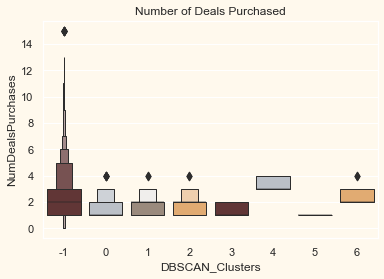

In [123]:
plt.figure()
pl = sns.boxenplot(x=df['DBSCAN_Clusters'], y=df['NumDealsPurchases'], palette=pal)
pl.set_title('Number of Deals Purchased')

# Partition Based Clustering

In [124]:
Kmeans = KMeans(n_clusters=4)

Kmeans_df = Kmeans.fit_predict(pca_ds)
pca_ds['Kmeans_clusters'] = Kmeans_df
df['Kmeans_clusters'] = Kmeans_df

Text(0.5, 1.0, 'Distribution Of The Clusters')

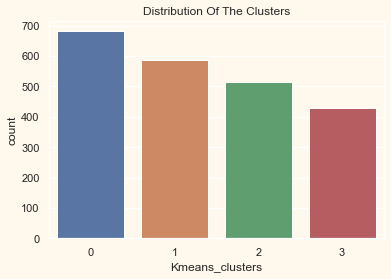

In [125]:
pl = sns.countplot(x=df['Kmeans_clusters'])
pl.set_title('Distribution Of The Clusters')

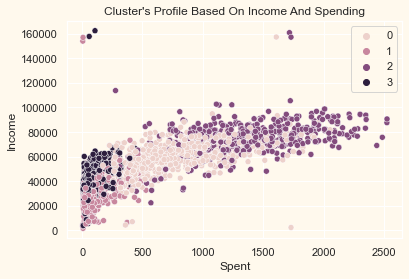

In [126]:
pl = sns.scatterplot(data=df, x=df['Spent'], y=df['Income'], hue=df['Kmeans_clusters'])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

# Silhouette Coefficient

In [127]:
from sklearn.metrics import silhouette_samples

In [131]:
# Hierachical
sample_silhouette_values = silhouette_samples(pca_ds, pca_ds['Clusters'])
print('Hierachical:', sample_silhouette_values.mean())

# Density - DBSCAN
sample_silhouette_values = silhouette_samples(pca_ds, pca_ds['DBSCAN_Clusters'])
print('Density:', sample_silhouette_values.mean())

# Kmeans
sample_silhouette_values = silhouette_samples(pca_ds, pca_ds['Kmeans_clusters'])
print('Kmeans:', sample_silhouette_values.mean())

Hierachical: 0.4354952313956416
Density: 0.03877045401852084
Kmeans: 0.44865078335614983
